In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directذءory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salaries/Salaries.csv


#About Dataset salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.
Features

    'Id'
    'EmployeeName'
    'JobTitle'
    'BasePay'
    'OvertimePay'
    'OtherPay'
    'Benefits'
    'TotalPay' -> salary
    'TotalPayBenefits'
    'Year'
    'Notes'
    'Agency'
    'Status'

Tasks

    Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

    Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

    Data Cleaning: Handle missing data by suitable method with explain why you use it.

    Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

    Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

    Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

    Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.



Very Important Note

There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [36]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv(r'/kaggle/input/salaries/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [37]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [38]:
# the number of rows in dataset is :
df.shape[0]

148654

In [39]:
# the number of columns in dataset is :
df.shape[1]

13

In [40]:
# the data type of each column is :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [41]:
#there are six columns with missing values ,they are : BasePay ,OvertimePay , OtherPay, Benefits, Notes ,Status

In [42]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [43]:
# We have two columns whose values are all missing values so I dropped them
df = df.drop("Notes" , axis = 1)
df = df.drop("Status" , axis = 1)

In [44]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [45]:
# the rest of columns with missing values , I have replaced them with the mean value in them columns :

df['BasePay'] = df['BasePay'].fillna(df['BasePay'].mean())
df['OvertimePay'] = df['OvertimePay'].fillna(df['OvertimePay'].mean())
df['OtherPay'] = df['OtherPay'].fillna(df['OtherPay'].mean())
df['Benefits'] = df['Benefits'].fillna(df['Benefits'].mean())

In [46]:
# the dataset after handle missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


In [47]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco


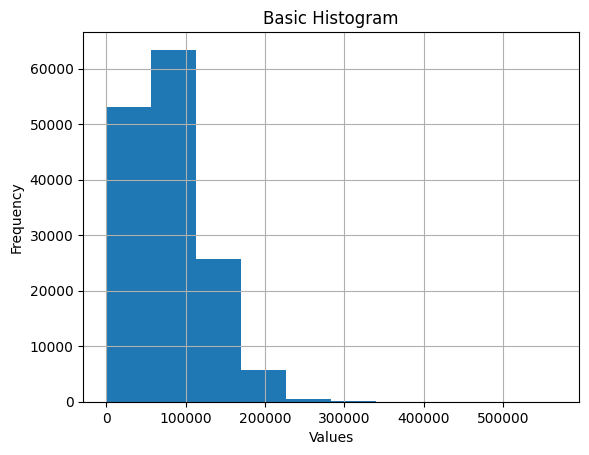

In [48]:
import matplotlib.pyplot as plt

# Plotting a basic histogram
df.hist(column='TotalPay')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

In [56]:
x = set(df["JobTitle"])
print(len(x))
x = list(x)
# count the values to plot pie chart
s = df.JobTitle.value_counts()
print(type(s))

print(s['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'])


2159
<class 'pandas.core.series.Series'>
2


In [64]:
s.max()

7036

In [68]:
df["JobTitle"].max()

'ZOO CURATOR'

In [69]:
df["JobTitle"].min()

'ACCOUNT CLERK'

In [65]:
s.min()

1

<Axes: ylabel='count'>

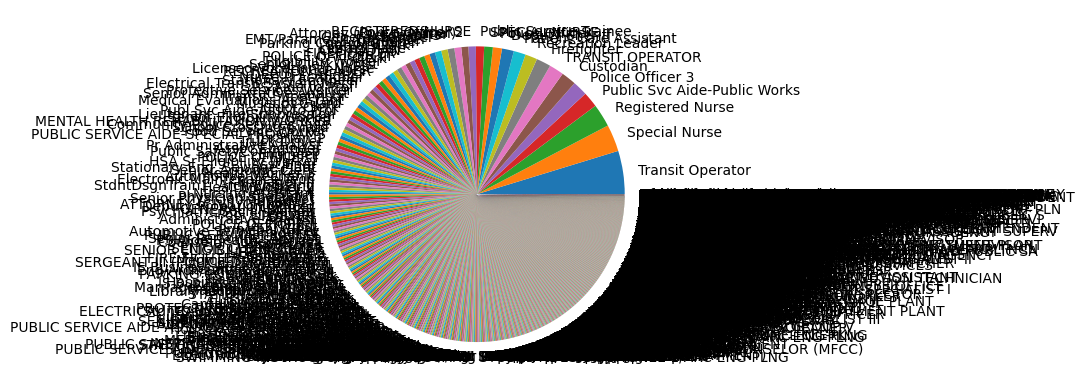

In [58]:
 s.plot.pie()

In [53]:
dept_emp_num =  df.groupby('JobTitle')['JobTitle'].count()
print(dept_emp_num)

JobTitle
ACCOUNT CLERK                                      83
ACCOUNTANT                                          5
ACCOUNTANT INTERN                                  48
ACPO,JuvP, Juv Prob (SFERS)                         1
ACUPUNCTURIST                                       1
                                                 ... 
X-RAY LABORATORY AIDE                              26
X-Ray Laboratory Aide                             100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS      1
Youth Comm Advisor                                  4
ZOO CURATOR                                         1
Name: JobTitle, Length: 2159, dtype: int64


In [59]:
dept_emp_num.describe()

count    2159.000000
mean       68.853173
std       268.923737
min         1.000000
25%         3.000000
50%        13.000000
75%        43.000000
max      7036.000000
Name: JobTitle, dtype: float64

In [54]:
#Group by two keys and then summarize each group
JobTitle_Agency_salary =  df.groupby(['JobTitle','Year'],as_index=False).TotalPay.mean()
print(JobTitle_Agency_salary)

                                            JobTitle  Year      TotalPay
0                                      ACCOUNT CLERK  2011  44035.664337
1                                         ACCOUNTANT  2011  47429.268000
2                                  ACCOUNTANT INTERN  2011  29031.742917
3                        ACPO,JuvP, Juv Prob (SFERS)  2014  62290.780000
4                                      ACUPUNCTURIST  2011  67594.400000
...                                              ...   ...           ...
4132  YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  2011  53632.870000
4133                              Youth Comm Advisor  2012  57544.730000
4134                              Youth Comm Advisor  2013  35823.295000
4135                              Youth Comm Advisor  2014  36465.910000
4136                                     ZOO CURATOR  2011  66686.560000

[4137 rows x 3 columns]


In [60]:
JobTitle_Agency_salary.max()

JobTitle    ZOO CURATOR
Year               2014
TotalPay     399211.275
dtype: object

In [61]:
JobTitle_Agency_salary.min()

JobTitle    ACCOUNT CLERK
Year                 2011
TotalPay              0.0
dtype: object

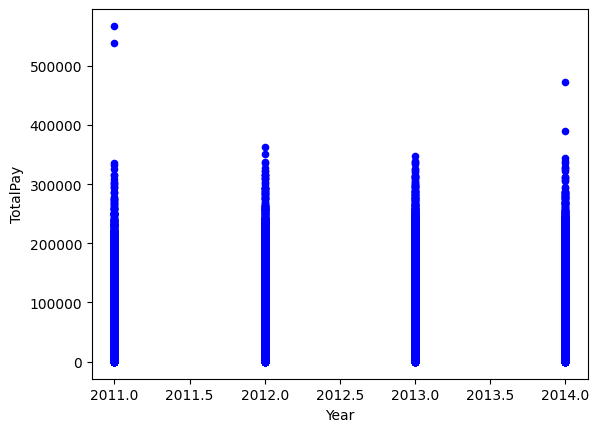

In [55]:
x1 = df.plot.scatter(x='Year',y='TotalPay',c='Blue')

In [ ]:
'''  Summary of Insights :
        The highest paying profession is: ZOO CURATOR
        The lowest paid profession is: ACCOUNT CLERK
        the salary raised in 2014
        The most practiced profession among all existing professions is : Transit operator
        